In [2]:
# Importing required libraries and dependencies 
import pandas as pd
import datetime as dt 
import numpy as np
import scipy as scipy
from prophet import Prophet 
import matplotlib.pyplot as plt
import hvplot.pandas as hvplot

In [3]:
private_sector_df = pd.read_csv("../Resources/privatesector_Data.csv", delimiter=';').dropna()
economy_df = pd.read_csv("../Resources/Economy_Data.csv", delimiter=';').dropna()
health_poverty_df = pd.read_csv("../Resources/HealthAndpoverty_Data.csv", delimiter=';').dropna()
education_environment_df = pd.read_csv("../Resources/EducationAndEnviron_Data.csv", delimiter=';').dropna()
public_sector_indicators_df = pd.read_csv("../Resources/PublicSector_Indicators.csv", delimiter=';').dropna()

display(private_sector_df.head())
display(economy_df.head())
display(health_poverty_df.head())
display(education_environment_df.head())
display(public_sector_indicators_df.head())


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Brazil,BRA,1970.0,1.189510e+01
2,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,India,IND,1970.0,5.556494e+00
5,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,Brazil,BRA,1970.0,1.851044e+00
7,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,India,IND,1970.0,9.207277e+00
64,Commercial service exports (current US$),TX.VAL.SERV.CD.WT,South Africa,ZAF,1970.0,5.739998e+08


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
5,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,Brazil,BRA,1970.0,3.918974e+11
7,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,India,IND,1970.0,1.915335e+11
10,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,Brazil,BRA,1970.0,3.786021e+10
11,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,China,CHN,1970.0,8.525561e+10
12,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,India,IND,1970.0,5.776720e+10


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Brazil,BRA,1970.0,77.1184
1,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,China,CHN,1970.0,38.6866
2,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,India,IND,1970.0,108.3178
3,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Russian Federation,RUS,1970.0,29.8818
4,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,South Africa,ZAF,1970.0,93.7106


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
24,"Adjusted net enrollment rate, primary (% of pr...",SE.PRM.TENR,South Africa,ZAF,1970.0,67.669150
29,"Adjusted net enrollment rate, primary, female ...",SE.PRM.TENR.FE,South Africa,ZAF,1970.0,68.242070
34,"Adjusted net enrollment rate, primary, male (%...",SE.PRM.TENR.MA,South Africa,ZAF,1970.0,67.096420
55,Agricultural land (% of land area),AG.LND.AGRI.ZS,Brazil,BRA,1970.0,23.378048
56,Agricultural land (% of land area),AG.LND.AGRI.ZS,China,CHN,1970.0,39.900940


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
20,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,Brazil,BRA,1970.0,1.641000e+02
22,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,India,IND,1970.0,9.630000e+01
24,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,South Africa,ZAF,1970.0,5.680000e+01
25,"Air transport, passengers carried",IS.AIR.PSGR,Brazil,BRA,1970.0,3.339800e+06
27,"Air transport, passengers carried",IS.AIR.PSGR,India,IND,1970.0,2.671600e+06


In [4]:
year = 2008
private_sector_df = private_sector_df.loc[private_sector_df["Year"] > year].reset_index(drop=True)
economy_df = economy_df.loc[economy_df["Year"] > year].reset_index(drop=True)
health_poverty_df = health_poverty_df.loc[health_poverty_df["Year"] > year].reset_index(drop=True)
education_environment_df = education_environment_df.loc[education_environment_df["Year"] > year].reset_index(drop=True)
public_sector_indicators_df = public_sector_indicators_df.loc[public_sector_indicators_df["Year"] > year].reset_index(drop=True)

display(private_sector_df.head())
display(economy_df.head())
display(health_poverty_df.head())
display(education_environment_df.head())
display(public_sector_indicators_df.head())

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Brazil,BRA,2009.0,3.770854
1,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,China,CHN,2009.0,0.448398
2,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,India,IND,2009.0,1.164823
3,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Russian Federation,RUS,2009.0,2.301575
4,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,South Africa,ZAF,2009.0,1.922157


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Brazil,BRA,2009.0,5.421578
1,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,China,CHN,2009.0,13.262097
2,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,India,IND,2009.0,9.589941
3,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Russian Federation,RUS,2009.0,-17.518426
4,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,South Africa,ZAF,2009.0,4.761918


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Brazil,BRA,2009.0,68.3124
1,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,China,CHN,2009.0,7.3248
2,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,India,IND,2009.0,37.9562
3,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Russian Federation,RUS,2009.0,28.3538
4,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,South Africa,ZAF,2009.0,69.1452


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Brazil,BRA,2009.0,93.27
1,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,China,CHN,2009.0,54.07
2,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,India,IND,2009.0,32.82
3,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Russian Federation,RUS,2009.0,96.93
4,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,South Africa,ZAF,2009.0,75.04


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Adequacy of social insurance programs (% of to...,per_si_allsi.adq_pop_tot,Brazil,BRA,2009.0,47.538288
1,Adequacy of social protection and labor progra...,per_allsp.adq_pop_tot,Brazil,BRA,2009.0,40.970682
2,Adequacy of social safety net programs (% of t...,per_sa_allsa.adq_pop_tot,Brazil,BRA,2009.0,9.425445
3,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,Brazil,BRA,2009.0,1782.300000
4,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,China,CHN,2009.0,11976.438000


In [5]:
# Start year and end year
start_year = 2009
end_year = 2019

# Function to return dataframe based on start_year and end_year
def fn_df_year_filter(df, start_year, end_year):
    return df[(df['Year'] >= start_year) & (df['Year'] <= end_year)].reset_index(drop=True)

def fn_df_set_data_types(df):
    return df.astype({'Country_Name': 'string',
                      'Country_Code': 'string',
                      'Series_Name': 'string',
                      'Series_Code': 'string',
                      'Year': 'int'})

# Restrict dataframes last 10 years of data
economy_final_df = fn_df_year_filter(economy_df, start_year, end_year)
education_environment_final_df = fn_df_year_filter(education_environment_df, start_year, end_year)
health_poverty_final_df = fn_df_year_filter(health_poverty_df, start_year, end_year)
private_sector_final_df = fn_df_year_filter(private_sector_df, start_year, end_year)
public_sector_final_df = fn_df_year_filter(public_sector_indicators_df, start_year, end_year)


In [6]:
# Concat all dataframes and collect global data
merged_all_df = pd.concat([economy_final_df, education_environment_final_df, health_poverty_final_df, private_sector_final_df, public_sector_final_df])

# Series dictionary to map Series_Code to Series_Name
dict_series = dict(merged_all_df[['SeriesCode', 'SeriesName']].drop_duplicates().reset_index(drop=True).values)

# Countries dictionary to map Country_Code to Country_Name
dict_countries = dict(merged_all_df[['CountryCode', 'CountryName']].drop_duplicates().reset_index(drop=True).values)

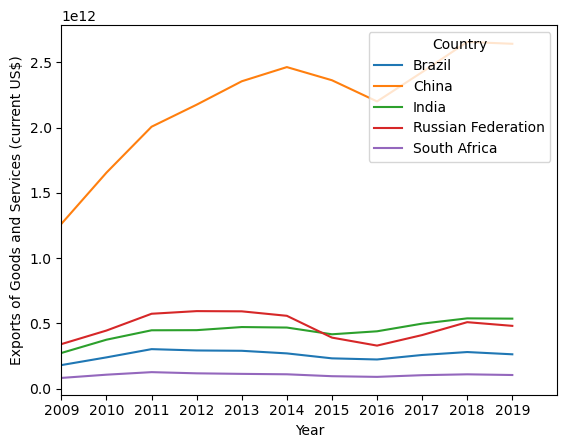

In [7]:
# Exports of Goods and Services (current US$)
exports_goods_services = economy_final_df.loc[economy_final_df["SeriesCode"].str.strip() == "NE.EXP.GNFS.CD"].reset_index(drop=True)

for country in exports_goods_services["CountryCode"].unique():
    country_data = exports_goods_services.loc[exports_goods_services["CountryCode"] == country]
    plt.plot(country_data["Year"], country_data["Value"], label=dict_countries[country])

plt.legend(title="Country",loc="upper right")
plt.xticks(np.arange(start_year, end_year + 1))
plt.xlim(start_year, end_year + 1)
plt.xlabel("Year")
plt.ylabel("Exports of Goods and Services (current US$)")

plt.show()

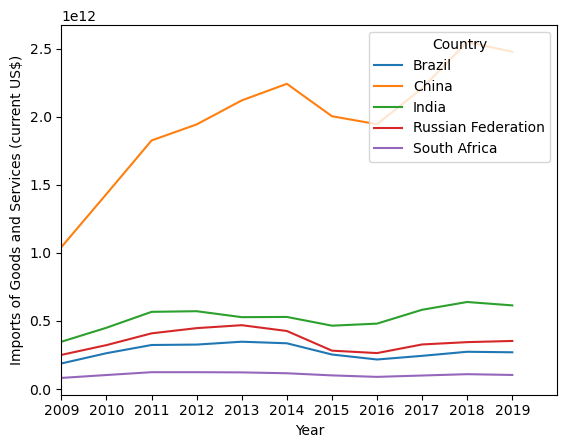

In [8]:
# Imports of goods and services (current US$)
imports_goods_services = economy_final_df.loc[economy_final_df["SeriesCode"].str.strip() == "NE.IMP.GNFS.CD"].reset_index(drop=True)

for country in imports_goods_services["CountryCode"].unique():
    country_data = imports_goods_services.loc[imports_goods_services["CountryCode"] == country]
    plt.plot(country_data["Year"], country_data["Value"], label=dict_countries[country])

plt.legend(title="Country",loc="upper right")
plt.xticks(np.arange(start_year, end_year + 1))
plt.xlim(start_year, end_year + 1)
plt.xlabel("Year")
plt.ylabel("Imports of Goods and Services (current US$)")

plt.show()

In [9]:
# Combining import and export data 
import_and_export = \
    economy_final_df.loc[(economy_final_df["SeriesCode"] == "NE.EXP.GNFS.CD")\
                         | (economy_final_df["SeriesCode"] == "NE.IMP.GNFS.CD")]\
                    .reset_index(drop=True)

import_and_export.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Exports of goods and services (current US$),NE.EXP.GNFS.CD,Brazil,BRA,2009.0,1.808945e+11
1,Exports of goods and services (current US$),NE.EXP.GNFS.CD,China,CHN,2009.0,1.262664e+12
2,Exports of goods and services (current US$),NE.EXP.GNFS.CD,India,IND,2009.0,2.737518e+11
3,Exports of goods and services (current US$),NE.EXP.GNFS.CD,Russian Federation,RUS,2009.0,3.415836e+11
4,Exports of goods and services (current US$),NE.EXP.GNFS.CD,South Africa,ZAF,2009.0,8.260146e+10


In [10]:
import_and_export = import_and_export.pivot(index=['CountryCode', 'Year'], columns="SeriesCode", values="Value")

import_and_export = import_and_export.reset_index()

import_and_export.head()

SeriesCode,CountryCode,Year,NE.EXP.GNFS.CD,NE.IMP.GNFS.CD
0,BRA,2009.0,1.808945e+11,1.876165e+11
1,BRA,2010.0,2.400068e+11,2.630014e+11
2,BRA,2011.0,3.030219e+11,3.231504e+11
3,BRA,2012.0,2.928043e+11,3.263105e+11
4,BRA,2013.0,2.903627e+11,3.472747e+11


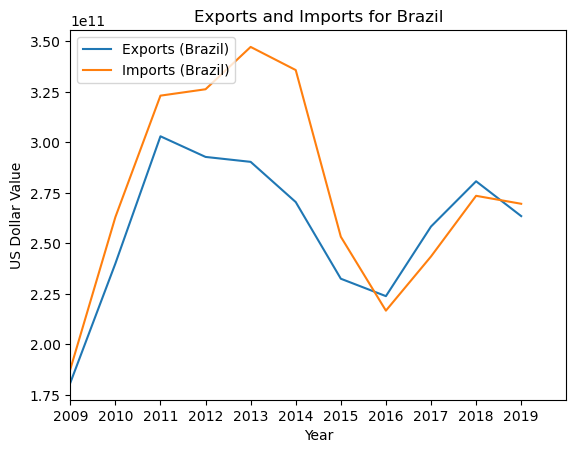

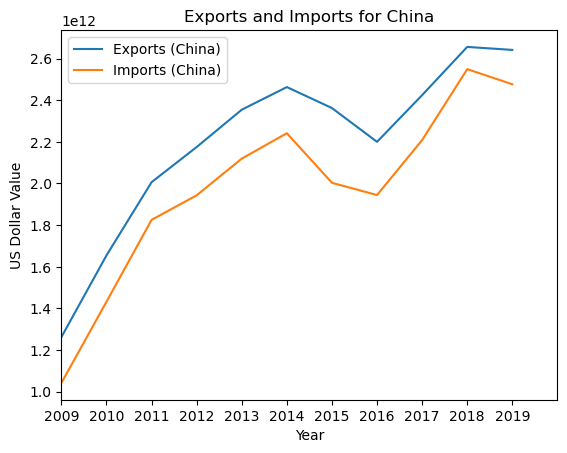

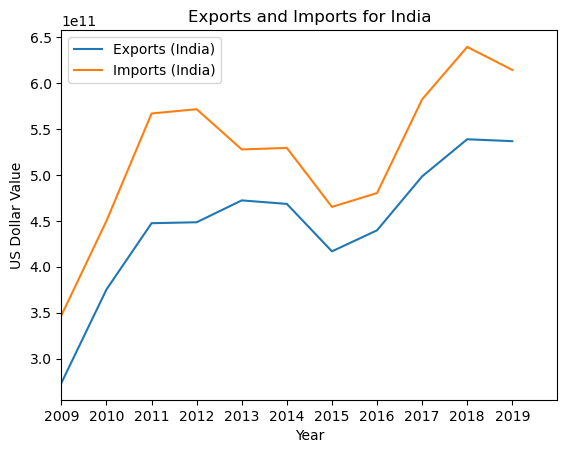

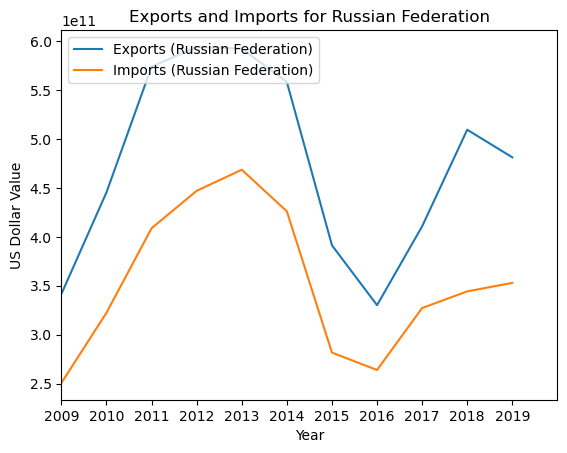

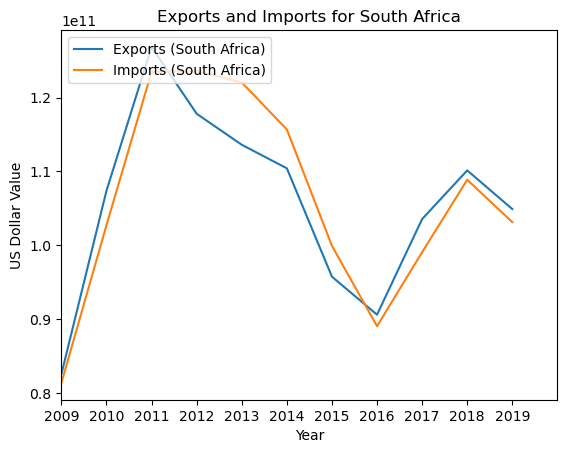

In [11]:
# Plotting import and export data for each country
for country in import_and_export["CountryCode"].unique():
    country_data = import_and_export.loc[import_and_export["CountryCode"] == country]
    
    # Checking to see if there is export or import data for this country
    if country_data["NE.EXP.GNFS.CD"].isna().all() or country_data["NE.IMP.GNFS.CD"].isna().all():
        print(f"No data available for {dict_countries.get(country, country)}. Skipping...")
        continue
    
    # Create a new figure for each country
    plt.figure()

    # Plot export data
    if not country_data["NE.EXP.GNFS.CD"].isna().all():
        plt.plot(country_data["Year"], country_data["NE.EXP.GNFS.CD"], 
                 label=f'Exports ({dict_countries.get(country, country)})')
    
    # Plot import data 
    if not country_data["NE.IMP.GNFS.CD"].isna().all():
        plt.plot(country_data["Year"], country_data["NE.IMP.GNFS.CD"], 
                 label=f'Imports ({dict_countries.get(country, country)})')

    # Set x-ticks, x-limits, and labels
    plt.xticks(np.arange(start_year, end_year + 1, 1))
    plt.xlim(start_year, end_year + 1)
    plt.xlabel("Year")
    plt.ylabel("US Dollar Value")
    
    # Add a legend for each country and adjust its position
    plt.legend(loc="upper left")

    # Add a title for the plot
    plt.title(f'Exports and Imports for {dict_countries.get(country, country)}')

    # Show the plot for each country
    plt.show()

    # Clear the figure to avoid overlap with the next plot
    plt.close()